# **Covid dashboard with mercury**

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests

In [2]:
covid = pd.read_csv("CovidFaelle_Altersgruppe.csv", sep = ';')

# without AUT (whole country)
covid_wo_aut = covid.loc[covid['Bundesland'] != "Österreich"]

In [3]:
state = ['Wien',
            'Niederösterreich',
            'Oberösterreich',
            'Burgenland', 
            'Steiermark',
            'Salzburg',
            'Kärnten',
            'Tirol', 'Vorarlberg']
male = False
female = True
celsius = 0

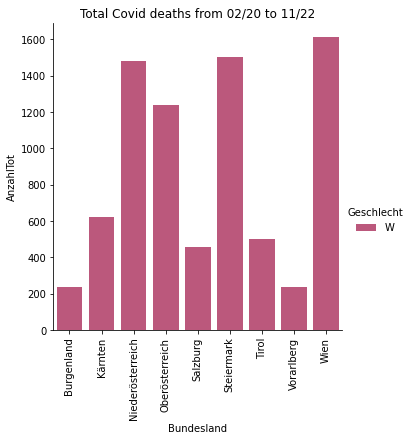

In [4]:
# Death count per state (absolute)

df_copy = covid_wo_aut.copy()

bundesland_sum_time = df_copy.groupby(by = ["Time", "Bundesland", "Geschlecht"], as_index = False).sum()
df = bundesland_sum_time[17892:17910][['Bundesland', 'AnzahlTot', 'Geschlecht']]
isin_state = df.Bundesland.isin(state)
df = df[isin_state]

if male == True and female == False:
    df = df[df['Geschlecht'] == 'M']

if male == False and female == True:
    df = df[df['Geschlecht'] == 'W']

ax = sns.catplot(x = "Bundesland",
                    kind = "bar",
                    y = "AnzahlTot",
                    hue = "Geschlecht",
                    data = df,
                    palette = "plasma").set(title = 'Total Covid deaths from 02/20 to 11/22')
plt.xticks(rotation = 90)
plt.show()

# **FastAPI**

In [37]:
payload = {"celsius": celsius}

In [42]:
fahrenheit = requests.post(url = "http://0.0.0.0:8001/calculateFahrenheit", data = json.dumps(payload))

In [44]:
print(f"{celsius}", "degree celsius is", f"{fahrenheit.text}", "fahrenheit")

0 degree celsius is 32.0 fahrenheit


In [ ]:
!mercury run 0.0.0.0:8000 exercise3-bartl.ipynb

                                                                                  
     _ __ ___   ___ _ __ ___ _   _ _ __ _   _ 
    | '_ ` _ \ / _ \ '__/ __| | | | '__| | | |
    | | | | | |  __/ | | (__| |_| | |  | |_| |
    |_| |_| |_|\___|_|  \___|\__,_|_|   \__, |
                                         __/ |
                                        |___/ 
        
Filepond app init: Creating temporary file upload directory </opt/conda/lib/python3.10/site-packages/mercury/uploads-temp>
Filepond app init: Creating file store directory </opt/conda/lib/python3.10/site-packages/mercury/uploads>...
Operations to perform:
  Apply all migrations: admin, auth, contenttypes, django_drf_filepond, notebooks, sessions, tasks
Running migrations:
  Applying contenttypes.0001_initial... OK
  Applying auth.0001_initial... OK
  Applying admin.0001_initial... OK
  Applying admin.0002_logentry_remove_auto_add... OK
  Applying admin.0003_logentry_add_action_flag_choices... OK
  Applying contenttypes